# Discovering Particles with CERN Open Data

The Large Hadron Collider (LHC) at CERN, in Geneva, became world-famous for discovering the Higgs Boson in 2012. During this task, you will use real data from the CMS experiment at the LHC to learn something about how this was done and hopefully discover a particle of your own!

<img src = "https://home.cern/sites/home.web.cern.ch/files/image/update-for_the_public/2015/03/cms-event.jpg">


## Particle Collisions

The LHC is trying to understand the structure of matter by smashing beams of protons together at very close to the speed of light. The energy involved in these collisions produces a shower of particles of all kinds. The CMS and ATLAS detectors look for the particles produced in these collisions and measure their properties. The speed that they are able to do this at is incredible, the LHC produces 40 000 000 collisions every second!

Some of the particles produced in the collisions (e.g. electrons and muons) can be directly measured by the detectors. Many of the more exotic and interesting particles (e.g. the famous Higgs boson), however, live for an incredibly short time and transform (decay) into other particles before the detectors can pick them up. So how can we tell they were there? 

## Hunting for the J/$\Psi$

We will hunt for evidence of one of these very short lived particles, called the J/$\psi$. Made up of a charm and anticharm quark bound together, its existence is predicted by the standard model of particle physics, but whenever one is created, it lasts an average of only $7,2 \cdot 10^{-21}$ s before transforming into other particles. This is far too short for it to register in the detectors at the LHC. Fortunately, however, one of the ways the J/$\psi$ can decay is into a muon-antimuon pair and CMS can detect these muons. The only problem with this, is that the detectors will see thousands of muons from each collision and only some of them will have been produced by a J/$\psi$. We need to deal with this problem before we can claim to have discovered experimental evidence for the existence of the J/$\psi$.

## Invariant Mass

There is a trick that particle physicsts can use when analysing the data produced by the detectors. By combining the momentum and energy of a pair of detected particles in a particular way, you can calculate quantitiy known as "Invariant Mass". If the two particles were, indeed, produced by the decay of another particle, this number will tell you the mass of that particle (in units of $GeV/c^2$). If our collisions are producing lots of J/$\psi$ particles then there should be lots of pairs of muons with an invariant mass corresponding to the predicted mass of the J/$\psi$.


To understand how to put this into practice and claim the discovery of a particle, we need to analyse some experimental data!


# Jupyter Notebooks

The document you are looking at now is a Jupyter Notebook. This is a tool used by real professional scientists at CERN (and elsewhere) to analyse the data coming from the LHC. Jupyter notebooks consist of text like this and code cells, like the one below. In the code cells, you can type code in the python programming language. Select the cell and then press ctrl+enter to run the code. Start by running the code cell below. (This code is needed to load some software packages that you will need to use later)

In [0]:
#lines of code writen with a hashtag like this are comments, and will be ignored when you run the code.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# How to deal with open data?
## 1. Reading data
 
 There are lots of open data portals, where you can find data according to your area of interest. 
 
 In our case, we'll use CERN open data portal. *(http://opendata.cern.ch/)*
 
 To read the data you need to create an array and  use  **pd.read_csv** function to fill this array with the data from the data source. 
 
The link to the data portal is the argument of the  **pd.read_csv**  function.
 
 *Note*: the data should be a* .csv* file
 
 **Example:**
 
 <font color='green'> muons = pd.read_csv('</font> <font color= 'red' > URL </font>  <font color='green'> ')</font>
 
**Note: Where example code is given in this notebook, you should leave the <font color='green'>green</font> parts as they are and replace the <font color= 'red' >red</font> parts.**



**Task 1.**


To begin our search for the J/ψ  we will load some real-life data taken from the CMS experiment at CERN. CMS makes this data publicly available on the CERN open data portal to use for projects like this! 

Use the example above to type some code into the cell below to create an array called muons and read in the data from: http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv

 

In [0]:
muons = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

## 2. Revealing data.
As you have noticed, nothing seems to have happened. The data is read and stored in your array, but the information is still "invisible" to you. 

It would be useful to know how much data we have just stored.

An array is really just a table, so we need to know the number of rows (this corresponds to the number of experimental measurements and is the length of the array)

**Pre-task**:

**Q:** Guess the length of the array you just filled (i.e. how many rows does it contain?) and type your guess in the text cell below.

**A:**

We can find out the length of an array using the len function

**Example:**

<font color = 'green'>len(</font><font color = 'red'>name_of_array</font><font color = 'green'>)</font>

**Task 2. **
Find the length of your array using the code cell below.


In [4]:
len(muons)

100000

**Task 3.**
*Discussion*: Why do we need so much data? 

**Task 4.** *Brainstorming*: What particle properties could be measured in this experiment? Type some suggestions in the text cell below

**A:**

**Task 5. **

Now it's time for us to shed some light on the content of our data. We can see the first 5 rows using the head function.

**Example:**

<font color = 'red'>name_of_array</font><font color = 'green'>.head()</font>

Use the code cell below to take a look at the first 5 rows of the data. 

In [5]:
muons.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


## 3. Understanding data






As you can see, there are two particles, since we are looking at pairs of muons. Their properties were measured and calculated in the detector after the collision.
Each column labeled with index 1 or 2 corresponds to the particle 1 or 2 respectively.


**E** - particle's energy

**px, py, pz** -  *x,y,z*-components of the particle's  momentum respectively

**pt** - the combination of px and py (component of the momentum that is perpendicular to the beam's movement direction)

**eta, phi** - angles that describe particle's movement direction;

**Q** - electrical charge of the particle in fundamental charge units

**M** - invariant mass of the particle pair


Note: Particle physicists use so called "natural units" for these quantities. These units use Einstein's famous equation E=mc$^2$ to write energy, momentum and mass in units of GeV, GeV/c and GeV/c$^2$ respectively

<img src="https://media.giphy.com/media/KpJtbODlSkxYk/giphy.gif" alt="collision">


## 4. Presenting the data 



Now we have lots of data presented in form of enormous table. This is clearly not the best to present it, if we want to analyse the data and find evidence for the existence of the J/$\psi$ particle.

We can use a Histogram to better present the data 


---



** *Quick reminder about constructing a histogram:*  **

** *Step 1.* ** 

"Bin"  the range of values —divide the entire range of values ( for example, particles energy) into a series of intervals. 
The bins are consecutive, non-overlapping intervals of a variable. 

The bins must be adjacent, and are usually of equal size.

** *Step 2.* ** 

Count how many values fall into each interval.If the bins are of equal size, a rectangle's height over the bin is proportional to the the number of cases in each bin. 

** Example Histogram **


![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Black_cherry_tree_histogram.svg/220px-Black_cherry_tree_histogram.svg.png)



---




We will now use some code to plot a histogram of our data 

**Example:**

<font color = 'green'> fig = plt.figure( figsize=(15, 10))</font> *(this line determines the size of the histogram and contains a x-scale and a y-scale (like the width and the height of a rectangle)*

<font color = 'green'>plt.hist(</font><font color = 'red'>name_of_array.name_of_column, number_of_bins , </font><font color = 'green'>range = </font><font color = 'red'>(min , max)</font><font color = 'green'>)</font> *(this line plots the histogram according to the parameters in the paranthesis."range" sets the limits for the values of the x-axis. 
)* 

<font color = 'green'>plt.xlabel(</font><font color = 'red'>'Label, Units'</font><font color = 'green'> \n, fontsize = 15</font>) *(this line labels the x axis, The "fontsize" value is used to determine the size of your text. The symbol \n creates a new line and makes the plot look nicer.)*

<font color = 'green'>plt.ylabel('Number of Events \n', fontsize = 15)</font> *(this line labels the y axis)*

<font color = 'green'>plt.title(</font><font color = 'red'>'Plot Title'</font><font color = 'green'> \n, fontsize = 15)</font> *(this line provides a title for the plot)*

<font color = 'green'>plt.show()

** Task 6 ** 
Plot a histogram for the invariant mass (M) from your data in the code cell below. 

*Suggestion * : Use a range of invariant masses between 0-150 and try different numbers of bins (start with 200) in order to get the most informative picture. There is no "best" number of bins, but different bin numbers can reveal different features of the data. So choose wisely.

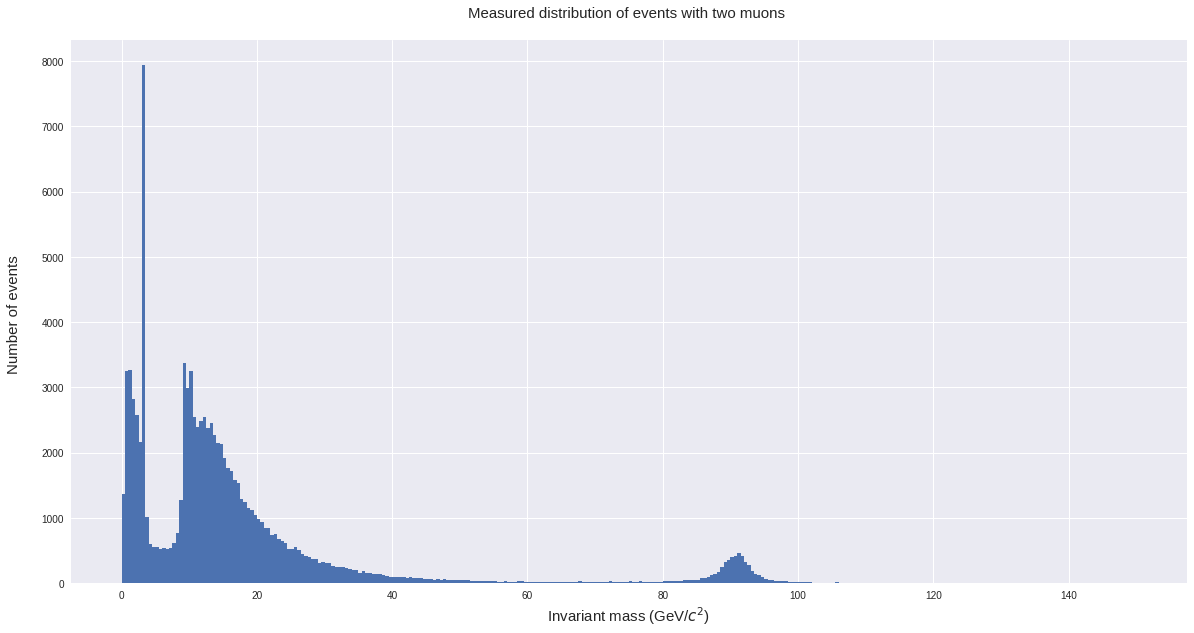

In [9]:
fig = plt.figure(figsize=(20, 10))

plt.hist(muons.M, 300, range = (0,150))

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)

plt.show()

** Task 7. **
What do you notice? Write some general observations based on your histogram in the text cell below. 

**A:**

## 5. Having a closer look.

Congratulations! You just plotted the whole data set and created a nice overview of the invariant masses of your 100 000 detected pairs of muons.

Now let's get one step further. <br>Remember our goal: we want to find evidence of a new particle!<br>Theoretical predictions from 1974 say that there is a probability of 6% that the J/$\psi$ will decay into two muons. The predicted particle has a mass of around $3 GeV/c^2$ and an average lifetime of $7,2\cdot10^{-21} s$ .

**Task 8. Answer the two questions below:**


<b>Q:</b> What is the important information in the text above which can be used to identify which part of our data set to take a closer look at? 

<b>A</b>:

<b>Q:</b> What does it mean to have a mass of $3 GeV/c^2$? How is the unit GeV related to the SI-unit "kg"?

<b>A:</b>

If we want to zoom in to look at some part of our histogram in more detail we need to create a new array which uses only the part of the data that we are interested in. Then we have to plot the new limited data set. Here is an example: 

**Example: **<br>
<br><font color='green'> <font color='red'>name_of_new_array</font> = <font color='red'>name_of_original_array</font>[(<font color='red'>name_of_original_array</font>.<font color='red'>name_of_column</font> >= <font color='red'>lower limit</font>) & (<font color='red'>name_of_original_array</font>.<font color='red'>name_of_column</font> <= <font color='red'>higher limit</font>)] </font>


**Task 9.** Use the code cell below to create a new array of data, limited to the data that will help us plot a zoomed in histogram to find evidence for the J/$\psi$.

In [0]:
bump = muons[(muons.M >= 2) & (muons.M <= 4)]

<img src="https://i.imgur.com/3fAd0w8.gif?1"
alt="Coding">

**Task 10.** Use the code cell below to plot a histogram of your new, selected data set. Refer to Section 4 above if you need to remind yourself how to plot a histogram. You might need to change some of the parameters now that you are using a more limited data set.

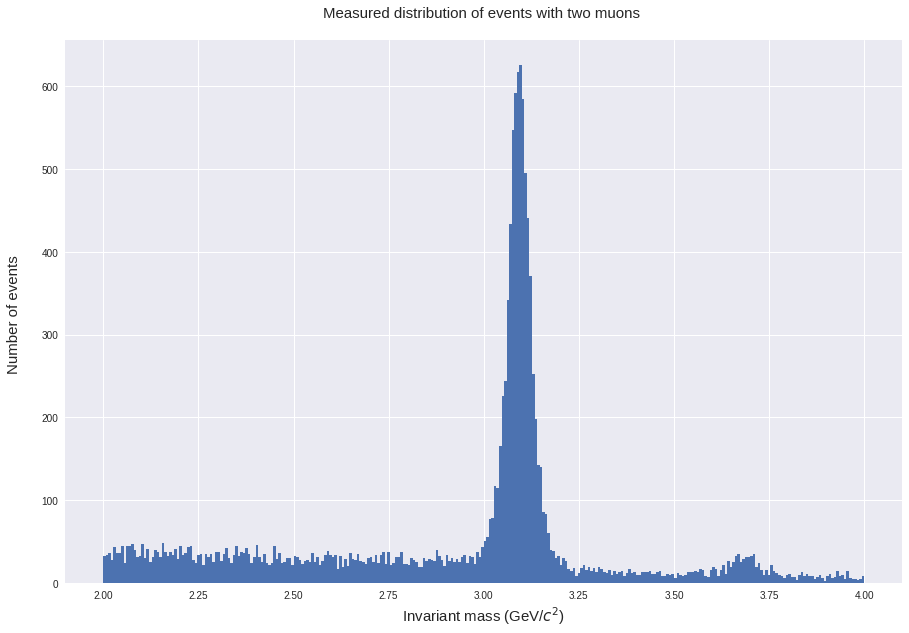

In [11]:
fig = plt.figure(figsize=(15, 10))

plt.hist(bump.M, 300, range = (2,4))

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)

plt.show()

## 6. Reflection Questions

<b>Q:</b> What the heck am I doing here?

<b>A:</b>

<b>Q:</b> How can we use the histogram above to give evidence for the existence of the J/$\psi$ particle?

<b>A:</b>

<b>Q:</b> What physical measurements did we have to make in order to produce this evidence? 

<b>A:</b>

<b>Q:</b> Do you think that this histogram supports the theoretical predictions?

<b>A:</b>

<b>Q:</b> Why can we not see the "clear" mass of our particle but instead a range of masses around it?

<b>A:</b>

<b>Q:</b> List the main steps you took to get to your final plot and describe them generally. 

<b>A:</b>

<b>Q:</b> What's your opinion: Can these steps be used to for other scientific problems? Why?

<b>A:</b>

<b>Q:</b> How could CERN open data be used to "find" other particles?

<b>A:</b>

<b>Q:</b> Why do scientists use programming languages like python and software like jupyter to deal with big data sets?

<b>A:</b>

<b> <center><font size="6">Congratulations! You just won the nobel prize!!</b> </center></font><br>
Here is some further information about the particle you just found.
<br>https://www.symmetrymagazine.org/breaking/2008/05/16/the-jpsi-particle-original-papers

<img src="https://media.giphy.com/media/3orif4qbRS6WjGJ2zC/giphy.gif"
alt="Nobel">

<img src="https://i.pinimg.com/originals/c0/11/53/c011532c725c0f282d20bc6ae46ab27e.gif"
alt="Nobel">

<img src="https://media.giphy.com/media/l0G16vfdq73AtzmKc/giphy.gif"
alt="Simpsons">

<img src="https://static1.squarespace.com/static/53422302e4b02233d7451d48/t/54507b04e4b0830eb42cc777/1414560526469/?format=1000w"
alt="Brain">